In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [95]:
def add_layer(inputs,in_size,out_size,activation_function=None):
    weights=tf.Variable(tf.random_normal([in_size,out_size]))    #####tensorflow的随机数据生成格式于numpy不同，numpy正太分布用点而不是横线：np.random.normal([3,4])
                                                                 ######其次，numpy生成平均分布可直接用np.random.rand(3,4)就行
    biases=tf.Variable(tf.zeros([1,out_size])+0.1)
    wx_plus_b=tf.matmul(inputs,weights)+biases
    if activation_function==None:
        outputs=wx_plus_b
    else:
        outputs=activation_function(wx_plus_b)
    return outputs

In [7]:
x_data=np.linspace(-1,1,300,dtype=np.float32)[:,np.newaxis]   ######最后面也可用.reshape(-1,1)代替[:,np.newaxis]
x_data.shape

(300, 1)

In [9]:
noise=np.random.normal(0,0.05,x_data.shape).astype(np.float32)    #####astype只在最后转换数据类型,如下面几个cell所示

In [54]:
a=np.random.rand(3,4)
a

array([[0.9119383 , 0.94031642, 0.99470951, 0.91530688],
       [0.7972689 , 0.91389724, 0.29733398, 0.22725941],
       [0.62164488, 0.22099592, 0.32897985, 0.57524918]])

In [67]:
type(a[0][0])

numpy.float64

In [69]:
a.astype(np.int32)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [75]:
type(a[0][0])

numpy.float64

In [74]:
type(a.astype(np.int32)[0][0])

numpy.int32

In [10]:
y_data=np.square(x_data)+0.5+noise

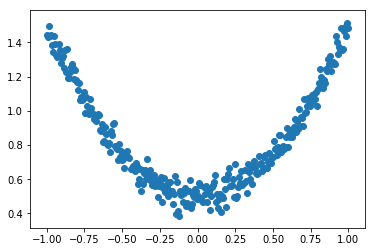

In [11]:
plt.scatter(x_data,y_data)

In [25]:
(x_data*x_data.T).shape

(300, 300)

In [47]:
xs=tf.placeholder(tf.float32,[None,1])   #########这里了的None不能用-1代替
ys=tf.placeholder(tf.float32,[None,1])

In [48]:
l1=add_layer(xs,1,10,activation_function=tf.nn.relu)
prediction=add_layer(l1,10,1,activation_function=None)

In [49]:
loss=tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),reduction_indices=[1]))
train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [50]:
sess=tf.Session()

In [51]:
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [52]:
for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i%50==0:
        print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))

0.12475268
0.006516593
0.0043991595
0.0040332703
0.003928535
0.0038563833
0.0037891797
0.003732287
0.0036832376
0.0036373972
0.0035893556
0.0035368644
0.0034913754
0.0034512698
0.0034164428
0.0033804898
0.0033494195
0.0033202097
0.0032905922
0.0032620647


In [89]:
w=tf.Variable(tf.random_normal([1,1]))

In [90]:
sess.run(tf.initialize_all_variables())

In [91]:
sess.run(w)

array([[1.1148566]], dtype=float32)

In [101]:
xs=tf.placeholder(tf.float32,[-1,1])

ValueError: Error converting shape to a TensorShape: Dimension -1 must be >= 0.